In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
df = pd.read_csv("/Users/tima/Downloads/dataset_telemetry.csv")

In [14]:
df.head(5)

,Unnamed: 0,userid,sessionid,timestamp,action,value,category,age,gender,city
0,0,user_10000,1,2021-12-30T12:28:45,category,0.0,Товары для детей,42,Ж,Красноярск
1,1,user_10000,1,2021-12-30T12:29:10,search,0.0,Товары для детей,42,Ж,Красноярск
2,2,user_10000,1,2021-12-30T12:29:25,product,0.0,Товары для детей,42,Ж,Красноярск
3,3,user_10000,1,2021-12-30T12:29:26,search,0.0,Товары для детей,42,Ж,Красноярск
4,4,user_10000,1,2021-12-30T12:29:34,search,0.0,Товары для детей,42,Ж,Красноярск


In [28]:
print("-" * 80)
print("АНАЛИЗ КАЧЕСТВА ДАННЫХ")
print("-" * 80)

print("\nОБЩАЯ ИНФОРМАЦИЯ О ДАТАСЕТЕ:")
print("-" * 40)
print(f"Размер датасета: {df.shape[0]} строк, {df.shape[1]} столбцов")
print(f"Информация о типах полей:")
print(df.dtypes)

print("\nСлучайные 5 строк:")
display(df.sample(5, random_state=42))

--------------------------------------------------------------------------------
АНАЛИЗ КАЧЕСТВА ДАННЫХ
--------------------------------------------------------------------------------

ОБЩАЯ ИНФОРМАЦИЯ О ДАТАСЕТЕ:
----------------------------------------
Размер датасета: 7510522 строк, 13 столбцов
Информация о типах полей:
Unnamed: 0              int64
userid                 object
sessionid               int64
timestamp      datetime64[ns]
action                 object
value                 float64
category               object
age                     int64
gender                 object
city                   object
date                   object
hour                    int32
day_of_week            object
dtype: object

Случайные 5 строк:


,Unnamed: 0,userid,sessionid,timestamp,action,value,category,age,gender,city,date,hour,day_of_week
7099979,7099979,user_12363,115,2022-08-21 04:26:36,cart,31100.0,Товары для детей,73,М,Екатеринбург,2022-08-21,4,Sunday
5439277,5439277,user_11810,326,2023-11-09 02:00:43,category,0.0,Авто/мото товары,27,Ж,Челябинск,2023-11-09,2,Thursday
5818009,5818009,user_11936,368,2023-12-02 07:05:46,product,0.0,Продовольственные товары,34,М,Санкт-Петербург,2023-12-02,7,Saturday
1609892,1609892,user_10535,475,2024-07-16 21:50:29,mainpage,0.0,NaN,35,М,Новосибирск,2024-07-16,21,Tuesday
1072548,1072548,user_10357,38,2022-03-13 17:00:47,search,0.0,Авто/мото товары,57,М,Москва,2022-03-13,17,Sunday


In [50]:
print("\n" + "-" * 80)
print("АНАЛИЗ ПРОПУЩЕННЫХ ЗНАЧЕНИЙ")
print("-" * 80)

# Количественный анализ пропусков
missing_values = df.isnull().sum()
missing_percent = (df.isnull().sum() / len(df)) * 100

missing_df = pd.DataFrame({
    'Количество пропусков': missing_values,
    'Процент пропусков': missing_percent.round(2)
})

print("\nПропуски по столбцам:")
display(missing_df[missing_df['Количество пропусков'] > 0])

print(f"\nОбщее количество пропусков в датасете: {df.isnull().sum().sum()}")
print(f"Общий процент пропусков: {(df.isnull().sum().sum() / (df.shape[0] * df.shape[1]) * 100).round(2)}%")


--------------------------------------------------------------------------------
АНАЛИЗ ПРОПУЩЕННЫХ ЗНАЧЕНИЙ
--------------------------------------------------------------------------------

Пропуски по столбцам:


,Количество пропусков,Процент пропусков
category,1111681,14.8



Общее количество пропусков в датасете: 1111681
Общий процент пропусков: 1.14%


In [68]:
print("=" * 80)
print("ОЧИСТКА ОТ ПРОПУСКОВ В CATEGORY")
print("=" * 80)

original_size = len(df)
print(f"Исходный размер: {original_size:,} записей")

df_clean = df.dropna(subset=['category'])

cleaned_size = len(df_clean)
removed_count = original_size - cleaned_size

print(f"\nУдалено строк с пропусками в category: {removed_count:,}")
print(f"Процент удаленных: {removed_count/original_size*100:.1f}%")
print(f"Осталось записей: {cleaned_size:,}")

df = df_clean.copy()

ОЧИСТКА ОТ ПРОПУСКОВ В CATEGORY
Исходный размер: 6,398,841 записей

Удалено строк с пропусками в category: 0
Процент удаленных: 0.0%
Осталось записей: 6,398,841


In [72]:
print("\n" + "-" * 80)
print("3. АНАЛИЗ ДУБЛИКАТОВ")
print("-" * 80)

full_duplicates = df.duplicated().sum()
print(f"Дубликатов: {full_duplicates}")


--------------------------------------------------------------------------------
3. АНАЛИЗ ДУБЛИКАТОВ
--------------------------------------------------------------------------------
Полных дубликатов (все поля одинаковые): 0


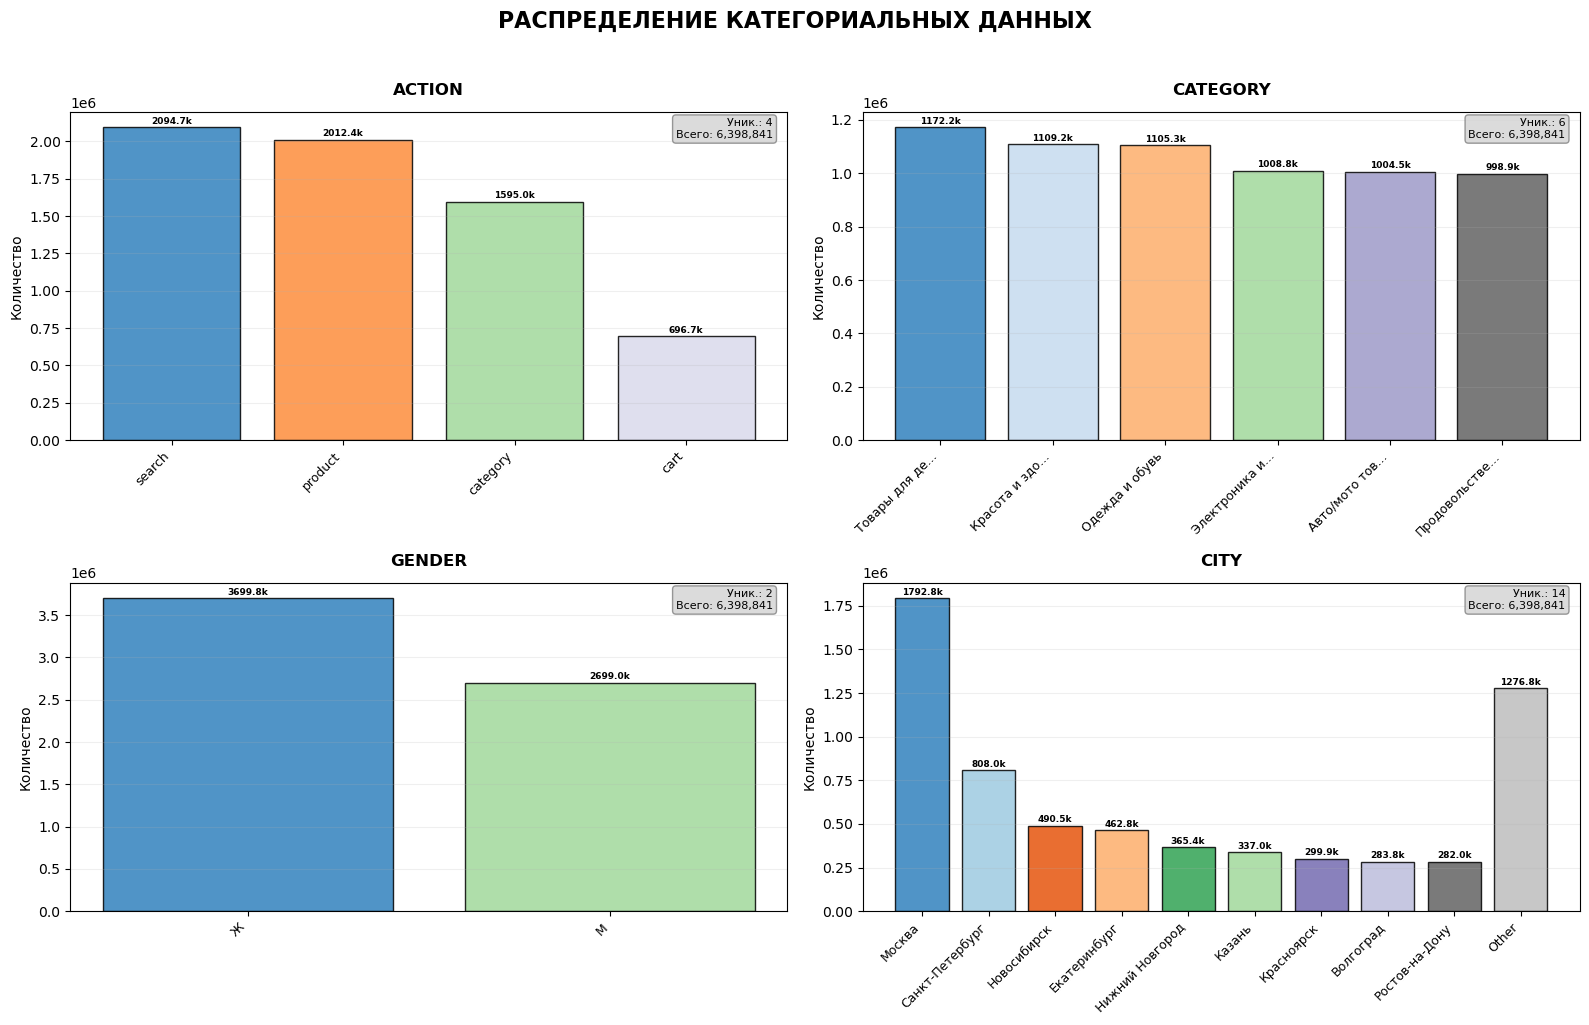

In [92]:
fig, axes = plt.subplots(2, 2, figsize=(16, 10))
fig.suptitle('РАСПРЕДЕЛЕНИЕ КАТЕГОРИАЛЬНЫХ ДАННЫХ', 
             fontsize=16, fontweight='bold', y=1.02)
axes = axes.flatten()

categorical_cols = ['action', 'category', 'gender', 'city']

for idx, col in enumerate(categorical_cols):
    if col in df.columns:
        ax = axes[idx]
        
        value_counts = df[col].value_counts(dropna=False)
        unique_count = len(value_counts)
        
        if unique_count > 1:
            show_n = min(10, unique_count)
            
            if unique_count > show_n:
                top_values = value_counts.head(show_n - 1)
                other_sum = value_counts.iloc[show_n - 1:].sum()
                if other_sum > 0:
                    top_values = pd.concat([top_values, pd.Series({'Other': other_sum})])
            else:
                top_values = value_counts
            
            colors = plt.cm.tab20c(np.arange(len(top_values)) / len(top_values))
            
            bars = ax.bar(range(len(top_values)), top_values.values, 
                         color=colors, edgecolor='black', alpha=0.85)
            
            null_count = df[col].isnull().sum()
            title = f'{col.upper()}'
            if null_count > 0:
                title += f' ({null_count} проп.)'
            ax.set_title(title, fontsize=12, pad=12, fontweight='bold')
            
            x_labels = []
            for label in top_values.index:
                if pd.isna(label):
                    label_str = 'Пропуск'
                else:
                    label_str = str(label)
                    if len(label_str) > 15:
                        label_str = label_str[:13] + '...'
                x_labels.append(label_str)
            
            ax.set_xticks(range(len(top_values)))
            ax.set_xticklabels(x_labels, rotation=45, ha='right', fontsize=9)
            
            ax.set_ylabel('Количество', fontsize=10)
            ax.grid(axis='y', alpha=0.2, linestyle='-')
            
            max_height = top_values.values.max()
            for bar, count in zip(bars, top_values.values):
                height = bar.get_height()
                
                if height > max_height * 0.07:
                    y_pos = height + max_height * 0.005
                    va = 'bottom'
                    text_color = 'black'
                    font_size = 6.5 
                else:
                    y_pos = height / 2
                    va = 'center'
                    text_color = 'white'
                    font_size = 6.5  
                
                if count > 1000:
                    text = f'{count/1000:.1f}k'
                else:
                    text = f'{int(count)}'
                
                ax.text(bar.get_x() + bar.get_width()/2., y_pos,
                       text, ha='center', va=va, 
                       fontsize=font_size, fontweight='bold',
                       color=text_color)
            
            legend_text = f'Уник.: {unique_count}\nВсего: {value_counts.sum():,}'
            if null_count > 0:
                legend_text += f'\nПроп.: {null_count}'
            
            ax.text(0.98, 0.98, legend_text, 
                   transform=ax.transAxes, fontsize=8, 
                   verticalalignment='top', horizontalalignment='right',
                   bbox=dict(boxstyle='round,pad=0.3', 
                           facecolor='lightgray', 
                           alpha=0.8,
                           edgecolor='gray'))
        
        else:
            ax.text(0.5, 0.5, 'Недостаточно данных', 
                   ha='center', va='center', transform=ax.transAxes, fontsize=11)
            ax.set_title(f'{col.upper()}', fontsize=12, pad=12)

for idx in range(len(categorical_cols), len(axes)):
    fig.delaxes(axes[idx])

plt.tight_layout()
plt.show()

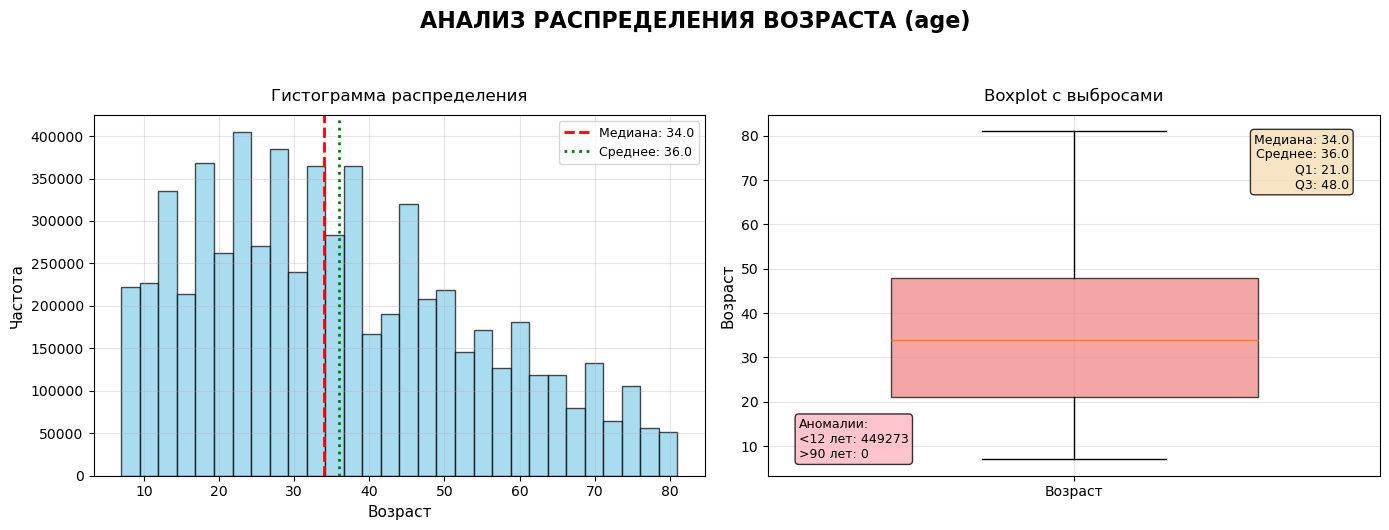

Уникальные значения пола: ['Ж' 'М']
Мужчин: 2699002 записей
Женщин: 3699839 записей


/var/folders/j4/79fj4fn91zlb8wkydvy_zbf00000gn/T/ipykernel_42033/3552559987.py:107: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  box2 = ax4.boxplot(data_to_plot, labels=labels, patch_artist=True)


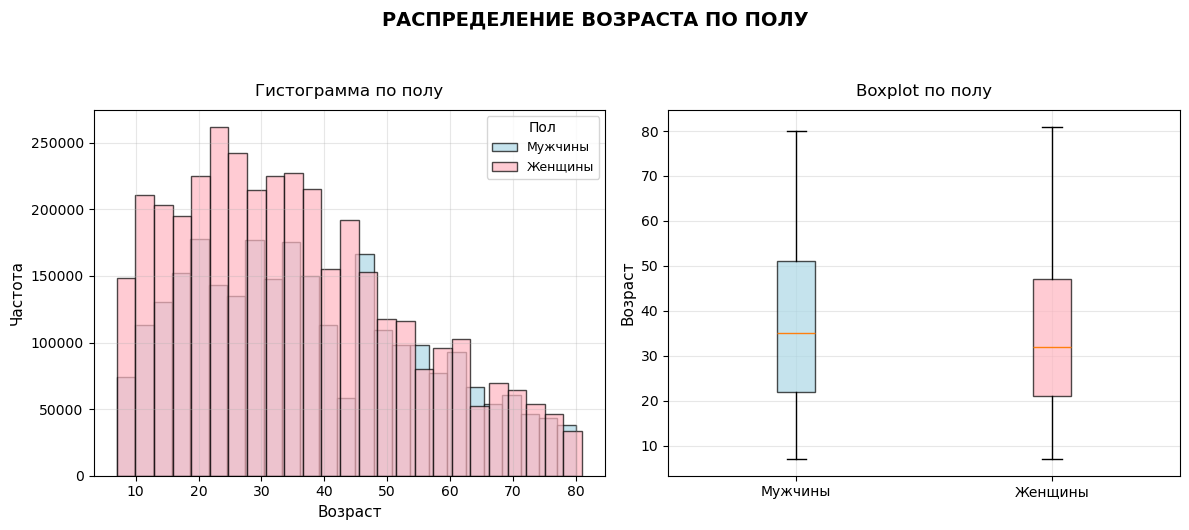

In [116]:
# Блок 7: СТАТИСТИЧЕСКИЙ АНАЛИЗ ЧИСЛОВЫХ ПОЛЕЙ
if 'age' in df.columns:
    # Создаем фигуру с заголовком
    fig = plt.figure(figsize=(14, 5))
    fig.suptitle('АНАЛИЗ РАСПРЕДЕЛЕНИЯ ВОЗРАСТА (age)', 
                 fontsize=16, fontweight='bold', y=1.05)
    
    # Визуализация распределения возраста
    if df['age'].notnull().sum() > 0:
        # Гистограмма
        ax1 = plt.subplot(1, 2, 1)
        ax1.hist(df['age'].dropna(), bins=30, edgecolor='black', alpha=0.7, color='skyblue')
        ax1.set_xlabel('Возраст', fontsize=11)
        ax1.set_ylabel('Частота', fontsize=11)
        ax1.set_title('Гистограмма распределения', fontsize=12, pad=10)
        ax1.axvline(df['age'].median(), color='red', linestyle='--', linewidth=2,
                   label=f'Медиана: {df["age"].median():.1f}')
        ax1.axvline(df['age'].mean(), color='green', linestyle=':', linewidth=2,
                   label=f'Среднее: {df["age"].mean():.1f}')
        ax1.grid(alpha=0.3)
        ax1.legend(fontsize=9)
        
        # Boxplot
        ax2 = plt.subplot(1, 2, 2)
        box = ax2.boxplot(df['age'].dropna(), patch_artist=True, widths=0.6)
        box['boxes'][0].set_facecolor('lightcoral')
        box['boxes'][0].set_alpha(0.7)
        ax2.set_ylabel('Возраст', fontsize=11)
        ax2.set_title('Boxplot с выбросами', fontsize=12, pad=10)
        ax2.set_xticklabels(['Возраст'])
        ax2.grid(alpha=0.3)
        
        # Добавляем статистику на boxplot
        stats_text = (f'Медиана: {df["age"].median():.1f}\n'
                     f'Среднее: {df["age"].mean():.1f}\n'
                     f'Q1: {df["age"].quantile(0.25):.1f}\n'
                     f'Q3: {df["age"].quantile(0.75):.1f}')
        ax2.text(0.95, 0.95, stats_text, transform=ax2.transAxes,
                fontsize=9, verticalalignment='top',
                horizontalalignment='right',
                bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.8))
        
        # Проверка аномалий
        anomalies_young = (df['age'] < 12).sum()
        anomalies_old = (df['age'] > 90).sum()
        
        if anomalies_young > 0 or anomalies_old > 0:
            ax2.text(0.05, 0.05, 
                    f'Аномалии:\n<12 лет: {anomalies_young}\n>90 лет: {anomalies_old}',
                    transform=ax2.transAxes, fontsize=9,
                    bbox=dict(boxstyle='round', facecolor='lightpink', alpha=0.8))
        
        plt.tight_layout()
        plt.show()
        
        # Дополнительная визуализация: распределение по полу (если есть данные)
        if 'gender' in df.columns:
            fig2, (ax3, ax4) = plt.subplots(1, 2, figsize=(12, 5))
            fig2.suptitle('РАСПРЕДЕЛЕНИЕ ВОЗРАСТА ПО ПОЛУ', 
                         fontsize=14, fontweight='bold', y=1.05)
            
            # Отфильтровываем пропуски
            age_gender_data = df[['age', 'gender']].dropna()
            
            if len(age_gender_data) > 0:
                print(f"Уникальные значения пола: {age_gender_data['gender'].unique()}")
                
                # Гистограмма по полу - ИСПРАВЛЕНО: используем 'М' и 'Ж'
                # Сначала мужчины ('М') - голубой
                if 'М' in age_gender_data['gender'].values:
                    male_data = age_gender_data[age_gender_data['gender'] == 'М']['age']
                    ax3.hist(male_data, bins=25, alpha=0.7, label='Мужчины',
                            color='lightblue', edgecolor='black')
                    print(f"Мужчин: {len(male_data)} записей")
                
                # Затем женщины ('Ж') - розовый
                if 'Ж' in age_gender_data['gender'].values:
                    female_data = age_gender_data[age_gender_data['gender'] == 'Ж']['age']
                    ax3.hist(female_data, bins=25, alpha=0.7, label='Женщины',
                            color='lightpink', edgecolor='black')
                    print(f"Женщин: {len(female_data)} записей")
                
                ax3.set_xlabel('Возраст', fontsize=11)
                ax3.set_ylabel('Частота', fontsize=11)
                ax3.set_title('Гистограмма по полу', fontsize=12, pad=10)
                ax3.legend(title='Пол', fontsize=9)
                ax3.grid(alpha=0.3)
                
                # Boxplot по полу
                data_to_plot = []
                labels = []
                colors_box = []
                
                # Добавляем мужчин ('М') - голубой
                if 'М' in age_gender_data['gender'].values:
                    data_to_plot.append(age_gender_data[age_gender_data['gender'] == 'М']['age'])
                    labels.append('Мужчины')
                    colors_box.append('lightblue')
                
                # Добавляем женщин ('Ж') - розовый
                if 'Ж' in age_gender_data['gender'].values:
                    data_to_plot.append(age_gender_data[age_gender_data['gender'] == 'Ж']['age'])
                    labels.append('Женщины')
                    colors_box.append('lightpink')
                
                if data_to_plot:
                    box2 = ax4.boxplot(data_to_plot, labels=labels, patch_artist=True)
                    
                    # Устанавливаем цвета для boxplot
                    for patch, color in zip(box2['boxes'], colors_box):
                        patch.set_facecolor(color)
                        patch.set_alpha(0.7)
                    
                    ax4.set_ylabel('Возраст', fontsize=11)
                    ax4.set_title('Boxplot по полу', fontsize=12, pad=10)
                    ax4.grid(alpha=0.3)
                else:
                    print("Нет данных для boxplot")
            
            else:
                print("Нет данных age+gender после фильтрации пропусков")
            
            plt.tight_layout()
            plt.show()

Пропусков в value: 0 (0.0%)


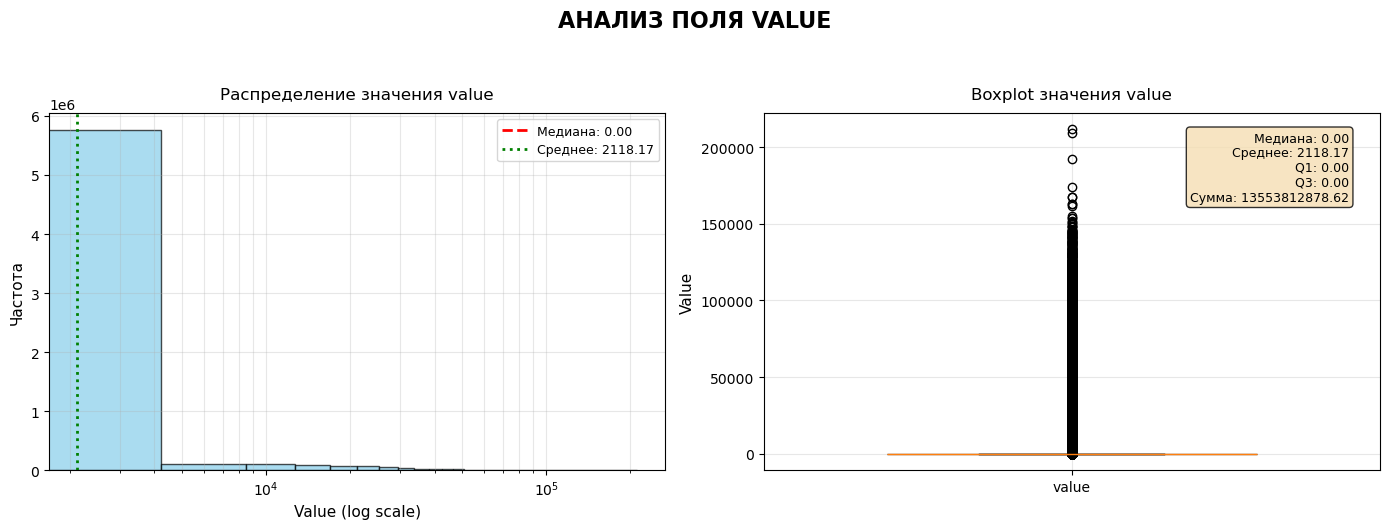

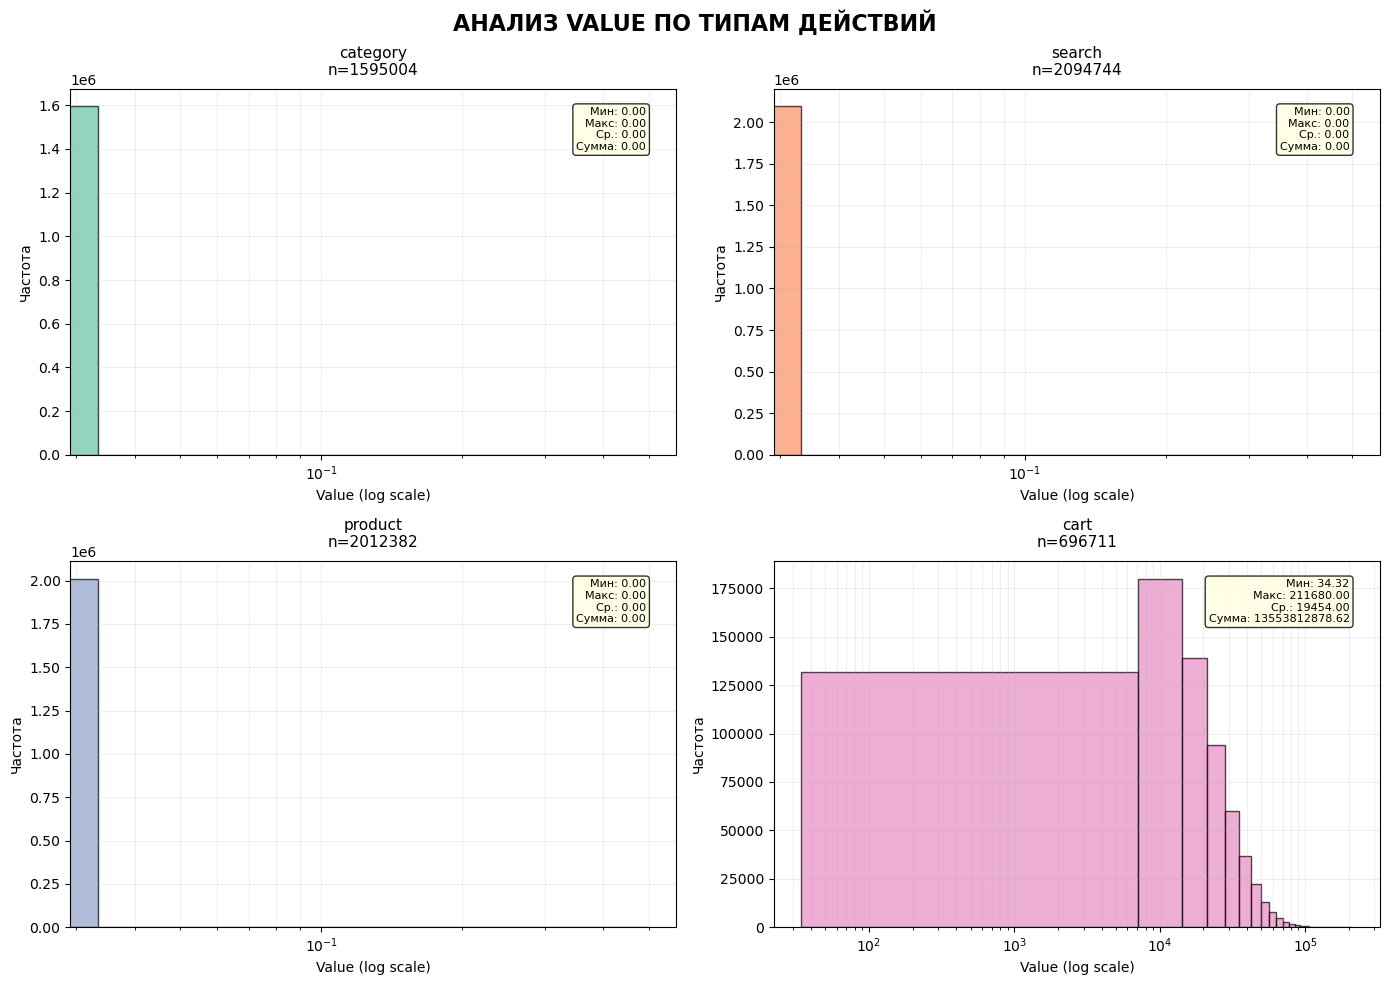

In [124]:
# Блок 8: АНАЛИЗ ПОЛЯ VALUE С ЛОГАРИФМИЧЕСКОЙ ОСЬЮ
if 'value' in df.columns:
    # Создаем фигуру
    fig = plt.figure(figsize=(14, 5))
    fig.suptitle('АНАЛИЗ ПОЛЯ VALUE', 
                 fontsize=16, fontweight='bold', y=1.05)
    
    print(f"Пропусков в value: {df['value'].isnull().sum()} ({df['value'].isnull().sum()/len(df)*100:.1f}%)")
    
    if df['value'].notnull().sum() > 0:
        # Гистограмма с логарифмической осью X
        ax1 = plt.subplot(1, 2, 1)
        ax1.hist(df['value'].dropna(), bins=50, edgecolor='black', alpha=0.7, color='skyblue')
        ax1.set_xlabel('Value (log scale)', fontsize=11)
        ax1.set_ylabel('Частота', fontsize=11)
        ax1.set_title('Распределение значения value', fontsize=12, pad=10)
        ax1.set_xscale('log')  # Логарифмическая ось X
        ax1.axvline(df['value'].median(), color='red', linestyle='--', linewidth=2,
                   label=f'Медиана: {df["value"].median():.2f}')
        ax1.axvline(df['value'].mean(), color='green', linestyle=':', linewidth=2,
                   label=f'Среднее: {df["value"].mean():.2f}')
        ax1.grid(alpha=0.3, which='both')
        ax1.legend(fontsize=9)
        
        # Boxplot
        ax2 = plt.subplot(1, 2, 2)
        box = ax2.boxplot(df['value'].dropna(), patch_artist=True, widths=0.6)
        box['boxes'][0].set_facecolor('lightcoral')
        box['boxes'][0].set_alpha(0.7)
        ax2.set_ylabel('Value', fontsize=11)
        ax2.set_title('Boxplot значения value', fontsize=12, pad=10)
        ax2.set_xticklabels(['value'])
        ax2.grid(alpha=0.3)
        
        # Добавляем статистику
        stats = df['value'].describe()
        stats_text = (f'Медиана: {stats["50%"]:.2f}\n'
                     f'Среднее: {stats["mean"]:.2f}\n'
                     f'Q1: {stats["25%"]:.2f}\n'
                     f'Q3: {stats["75%"]:.2f}\n'
                     f'Сумма: {df["value"].sum():.2f}')
        
        ax2.text(0.95, 0.95, stats_text, transform=ax2.transAxes,
                fontsize=9, verticalalignment='top',
                horizontalalignment='right',
                bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.8))
        
        plt.tight_layout()
        plt.show()
        
        # Анализ value по типам действий
        if 'action' in df.columns:
            fig2, axes = plt.subplots(2, 2, figsize=(14, 10))
            fig2.suptitle('АНАЛИЗ VALUE ПО ТИПАМ ДЕЙСТВИЙ', 
                         fontsize=16, fontweight='bold', y=0.98)
            
            actions_with_value = df[df['value'].notnull()]['action'].unique()
            
            for idx, action_type in enumerate(actions_with_value[:4]):  # Первые 4 действия
                ax = axes[idx // 2, idx % 2]
                action_data = df[(df['action'] == action_type) & (df['value'].notnull())]
                
                if len(action_data) > 0:
                    # Гистограмма с логарифмической осью X
                    ax.hist(action_data['value'], bins=30, edgecolor='black', 
                           alpha=0.7, color=plt.cm.Set2(idx))
                    ax.set_xlabel('Value (log scale)', fontsize=10)
                    ax.set_ylabel('Частота', fontsize=10)
                    ax.set_title(f'{action_type}\nn={len(action_data)}', fontsize=11, pad=10)
                    ax.set_xscale('log')  # Логарифмическая ось X
                    ax.grid(alpha=0.2, which='both')
                    
                    # Добавляем статистику
                    stats_text = (f'Мин: {action_data["value"].min():.2f}\n'
                                 f'Макс: {action_data["value"].max():.2f}\n'
                                 f'Ср.: {action_data["value"].mean():.2f}\n'
                                 f'Сумма: {action_data["value"].sum():.2f}')
                    
                    ax.text(0.95, 0.95, stats_text, transform=ax.transAxes,
                           fontsize=8, verticalalignment='top',
                           horizontalalignment='right',
                           bbox=dict(boxstyle='round', facecolor='lightyellow', alpha=0.8))
            
            # Скрываем пустые оси
            for idx in range(len(actions_with_value[:4]), 4):
                axes[idx // 2, idx % 2].axis('off')
            
            plt.tight_layout()
            plt.show()

--------------------------------------------------------------------------------
АНАЛИЗ ВРЕМЕННЫХ ДАННЫХ
--------------------------------------------------------------------------------
Период данных: с 2021-12-26 21:00:28 по 2025-01-03 20:59:30
Длительность: 1103 days 23:59:02
Количество дней в данных: 1105
Записей в день (в среднем): 5791


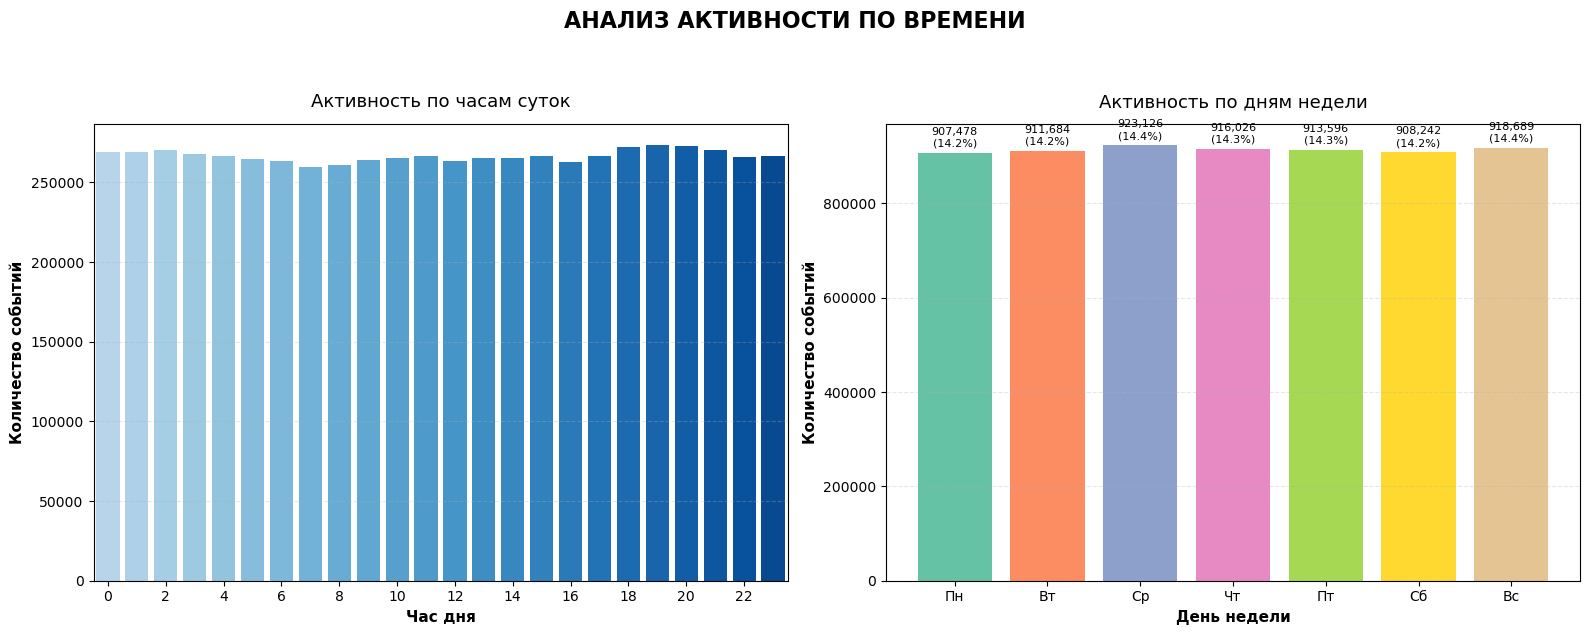

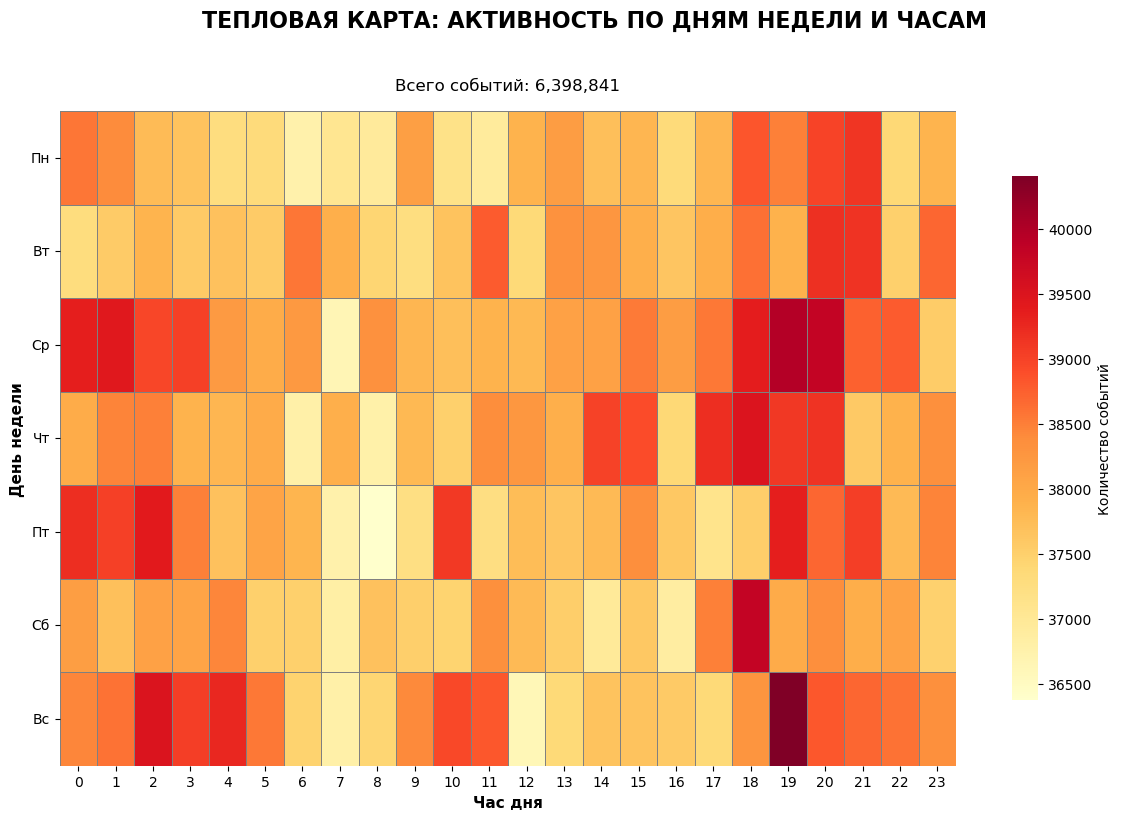

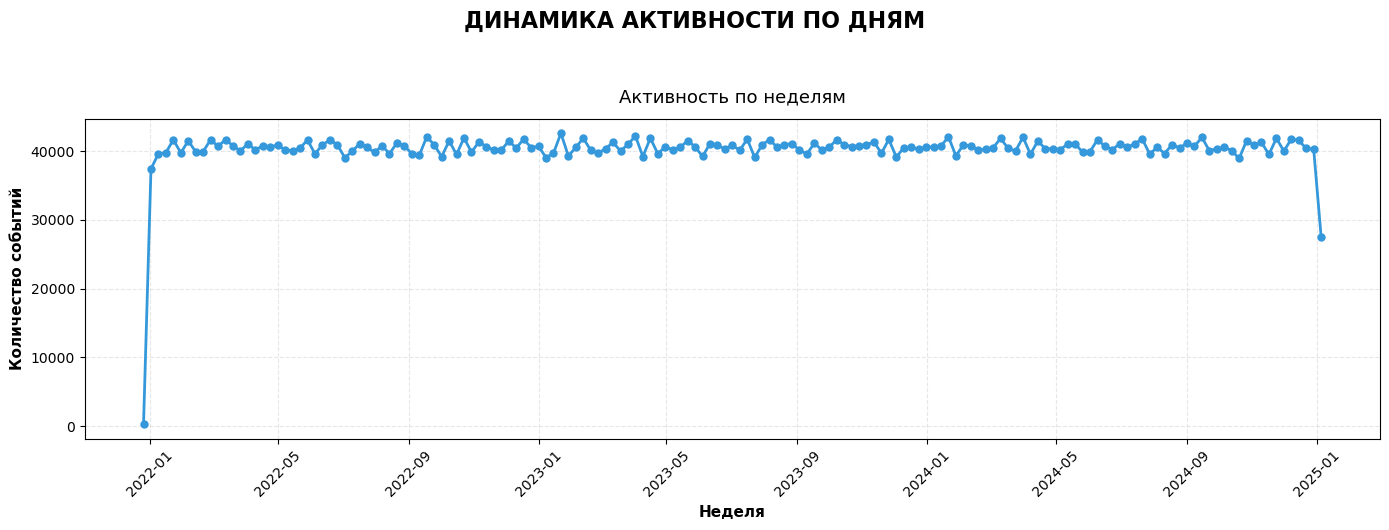

In [144]:
# Блок 9: АНАЛИЗ ВРЕМЕННЫХ ДАННЫХ
if 'timestamp' in df.columns:
    print("-" * 80)
    print("АНАЛИЗ ВРЕМЕННЫХ ДАННЫХ")
    print("-" * 80)
    
    # Преобразуем в datetime, если это еще не сделано
    if not pd.api.types.is_datetime64_any_dtype(df['timestamp']):
        print("Преобразование timestamp в datetime формат...")
        try:
            df['timestamp'] = pd.to_datetime(df['timestamp'])
            print("✓ Преобразование успешно")
        except Exception as e:
            print(f"✗ Ошибка преобразования: {e}")
    
    if pd.api.types.is_datetime64_any_dtype(df['timestamp']):
        # Добавляем вспомогательные колонки
        df['date'] = df['timestamp'].dt.date
        df['hour'] = df['timestamp'].dt.hour
        df['day_of_week'] = df['timestamp'].dt.day_name()
        df['month'] = df['timestamp'].dt.month
        df['weekday_num'] = df['timestamp'].dt.weekday
        
        # Анализ временного периода
        min_date = df['timestamp'].min()
        max_date = df['timestamp'].max()
        date_range = max_date - min_date
        
        print(f"Период данных: с {min_date} по {max_date}")
        print(f"Длительность: {date_range}")
        print(f"Количество дней в данных: {df['date'].nunique()}")
        print(f"Записей в день (в среднем): {len(df) / df['date'].nunique():.0f}")
        
        # ========== ФИГУРА 1: АКТИВНОСТЬ ПО ЧАСАМ И ДНЯМ НЕДЕЛИ ==========
        fig1, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))
        fig1.suptitle('АНАЛИЗ АКТИВНОСТИ ПО ВРЕМЕНИ', 
                     fontsize=16, fontweight='bold', y=1.05)
        
        # 1. Активность по часам (без значений над столбцами)
        hourly_activity = df['hour'].value_counts().sort_index()
        bars1 = ax1.bar(hourly_activity.index, hourly_activity.values, 
                       color=plt.cm.Blues(np.linspace(0.3, 0.9, len(hourly_activity))))
        ax1.set_xlabel('Час дня', fontsize=11, fontweight='bold')
        ax1.set_ylabel('Количество событий', fontsize=11, fontweight='bold')
        ax1.set_title('Активность по часам суток', fontsize=13, pad=12)
        ax1.set_xticks(range(0, 24, 2))
        ax1.set_xlim(-0.5, 23.5)
        ax1.grid(axis='y', alpha=0.3, linestyle='--')
        
        # 2. Активность по дням недели
        weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
        weekday_activity = df['day_of_week'].value_counts()
        weekday_activity = weekday_activity.reindex(weekday_order)
        
        # Русские названия для отображения
        russian_days = ['Пн', 'Вт', 'Ср', 'Чт', 'Пт', 'Сб', 'Вс']
        
        bars2 = ax2.bar(range(len(weekday_activity)), weekday_activity.values, 
                       color=plt.cm.Set2(range(len(weekday_activity))))
        ax2.set_xlabel('День недели', fontsize=11, fontweight='bold')
        ax2.set_ylabel('Количество событий', fontsize=11, fontweight='bold')
        ax2.set_title('Активность по дням недели', fontsize=13, pad=12)
        ax2.set_xticks(range(len(weekday_activity)))
        ax2.set_xticklabels(russian_days, fontsize=10)
        ax2.grid(axis='y', alpha=0.3, linestyle='--')
        
        # Добавляем значения на столбцы (только для дней недели)
        for i, (bar, count) in enumerate(zip(bars2, weekday_activity.values)):
            height = bar.get_height()
            percent = (count / weekday_activity.sum()) * 100
            ax2.text(bar.get_x() + bar.get_width()/2., height + max(weekday_activity.values)*0.01,
                    f'{int(count):,}\n({percent:.1f}%)', ha='center', va='bottom', 
                    fontsize=8, linespacing=1.2)
        
        plt.tight_layout()
        plt.show()
        
        # ========== ФИГУРА 2: HEATMAP ДЕНЬ НЕДЕЛИ vs ЧАС ==========
        fig2, ax3 = plt.subplots(figsize=(12, 8))
        fig2.suptitle('ТЕПЛОВАЯ КАРТА: АКТИВНОСТЬ ПО ДНЯМ НЕДЕЛИ И ЧАСАМ', 
                     fontsize=16, fontweight='bold', y=1.02)
        
        # Подготавливаем данные для heatmap
        pivot_data = df.pivot_table(index='day_of_week', columns='hour', 
                                   values='timestamp', aggfunc='count', fill_value=0)
        
        # Сортируем дни недели в правильном порядке
        pivot_data = pivot_data.reindex(weekday_order)
        
        # Создаем heatmap
        sns.heatmap(pivot_data, cmap='YlOrRd', linewidths=0.5, linecolor='gray',
                   cbar_kws={'label': 'Количество событий', 'shrink': 0.8},
                   ax=ax3)
        
        # Русские названия дней недели для heatmap
        ax3.set_yticklabels(russian_days, rotation=0, fontsize=10)
        ax3.set_xlabel('Час дня', fontsize=11, fontweight='bold')
        ax3.set_ylabel('День недели', fontsize=11, fontweight='bold')
        
        # Добавляем общее количество событий в заголовок
        total_events = pivot_data.sum().sum()
        ax3.set_title(f'Всего событий: {total_events:,}', fontsize=12, pad=15)
        
        plt.tight_layout()
        plt.show()
        
        # ========== ФИГУРА 3: ДИНАМИКА АКТИВНОСТИ ПО ДНЯМ ==========
        fig3, ax4 = plt.subplots(figsize=(14, 5))
        fig3.suptitle('ДИНАМИКА АКТИВНОСТИ ПО ДНЯМ', 
                     fontsize=16, fontweight='bold', y=1.05)
        
        # Линейный график активности по дням
        daily_activity = df.groupby('date').size()
        
        # Если дней много, группируем по неделям для лучшей читаемости
        if len(daily_activity) > 30:
            # Конвертируем в период недель
            weekly_activity = df.groupby(pd.Grouper(key='timestamp', freq='W')).size()
            ax4.plot(weekly_activity.index, weekly_activity.values, 
                    marker='o', linewidth=2, color='#3498db', markersize=5)
            ax4.set_xlabel('Неделя', fontsize=11, fontweight='bold')
            ax4.set_title('Активность по неделям', fontsize=13, pad=12)
            ax4.tick_params(axis='x', rotation=45)
        else:
            ax4.plot(daily_activity.index, daily_activity.values, 
                    marker='o', linewidth=2, color='#3498db', markersize=5)
            ax4.set_xlabel('Дата', fontsize=11, fontweight='bold')
            ax4.set_title('Активность по дням', fontsize=13, pad=12)
            ax4.tick_params(axis='x', rotation=45)
        
        ax4.set_ylabel('Количество событий', fontsize=11, fontweight='bold')
        ax4.grid(alpha=0.3, linestyle='--')
        
        plt.tight_layout()
        plt.show()

АНАЛИЗ АКТИВНОСТИ ПО РЕГИОНАМ (ГОРОДАМ)
Всего городов: 14
Всего записей: 6,398,841
Пропусков в city: 0 (0.0%)


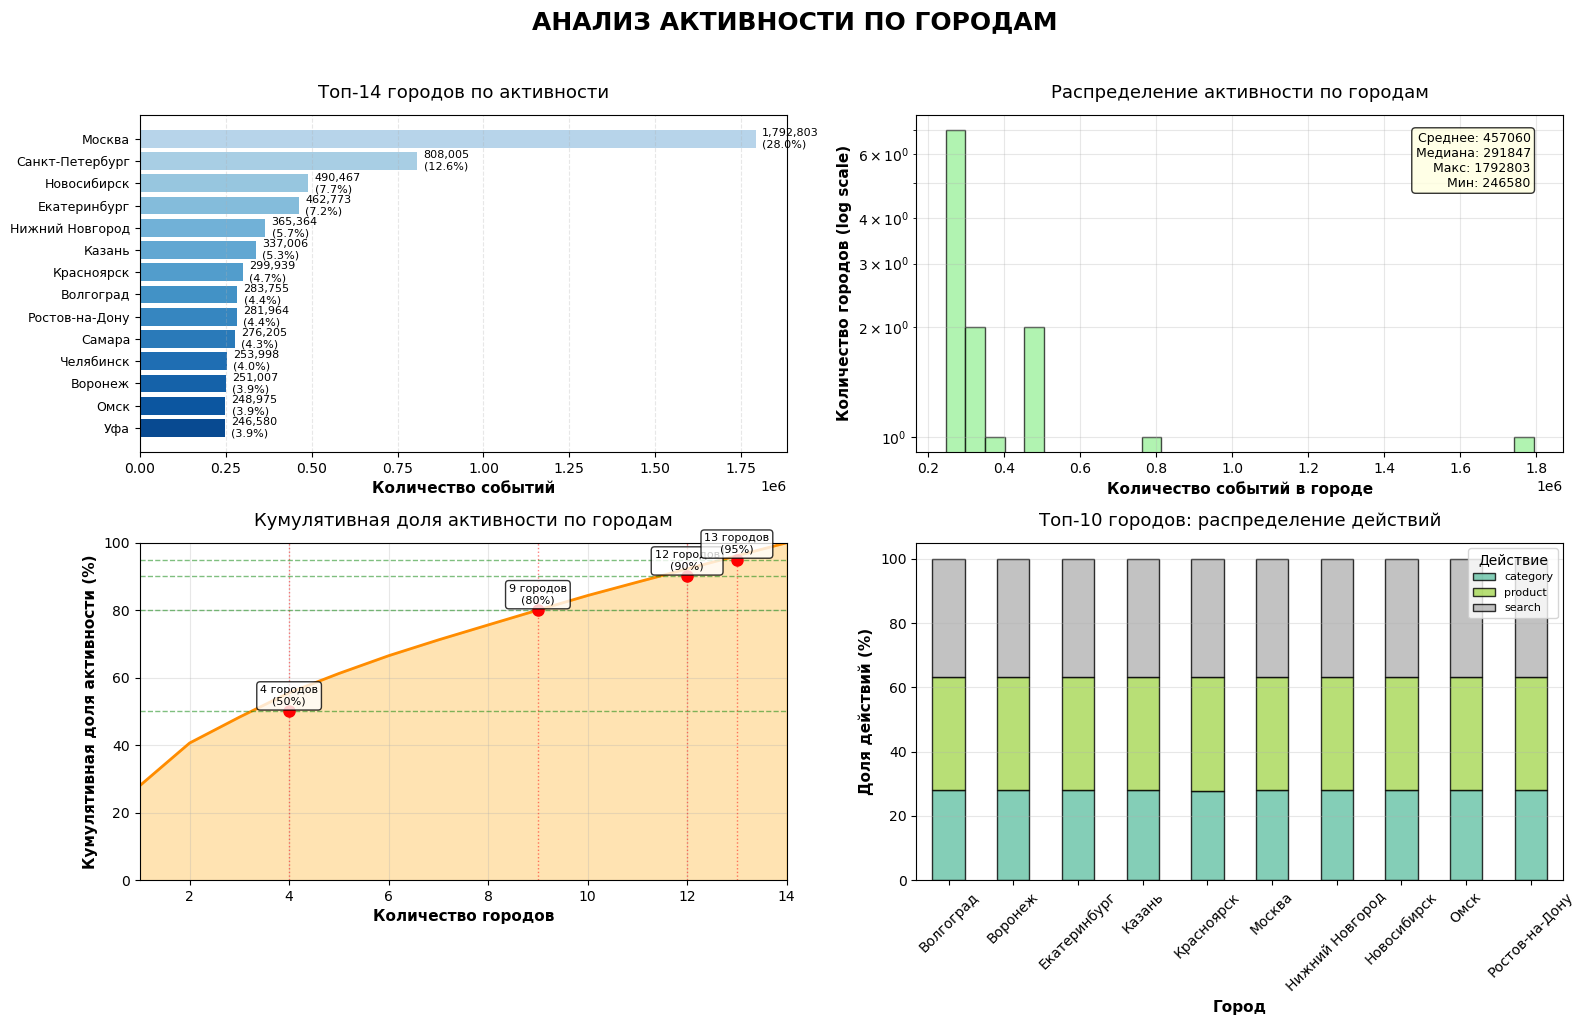


--------------------------------------------------------------------------------
ДЕМОГРАФИЧЕСКИЙ АНАЛИЗ ПО ГОРОДАМ
--------------------------------------------------------------------------------


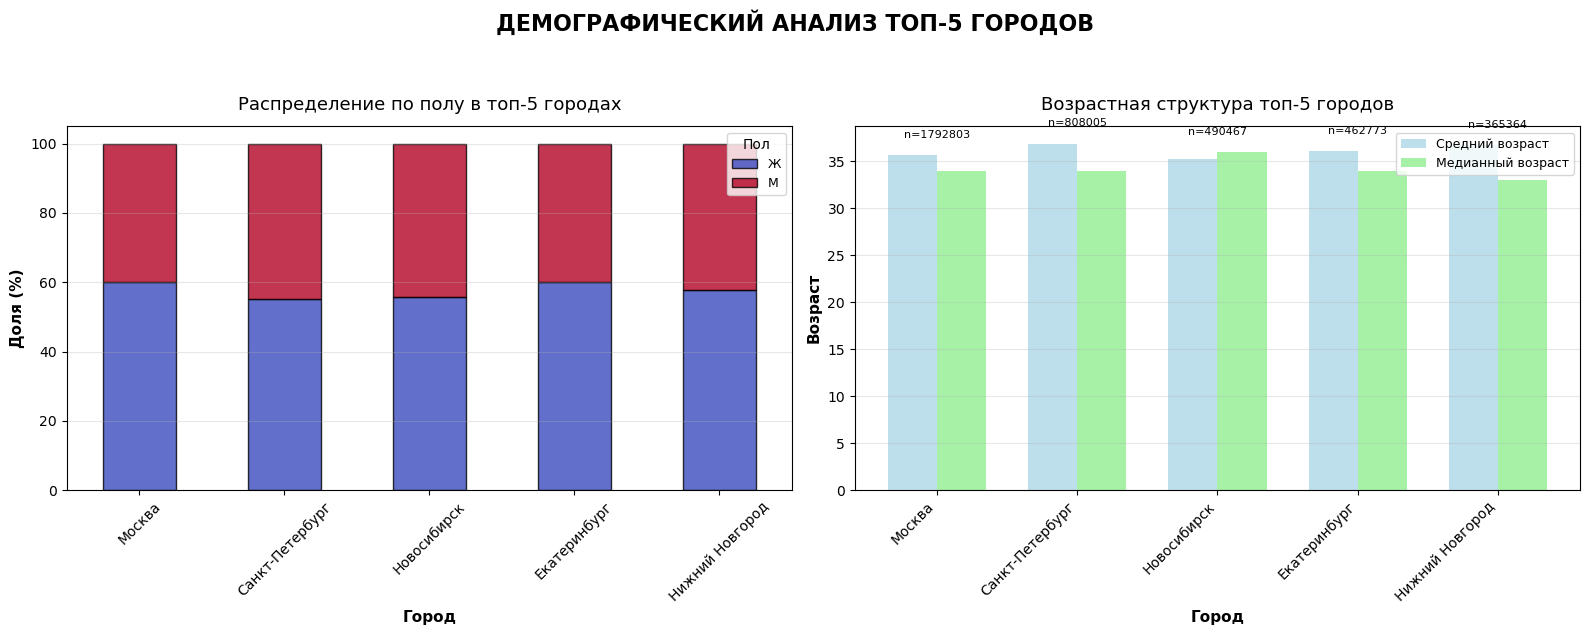


Статистика по топ-5 городам:
------------------------------------------------------------
Москва                        : 1792803 пользователей | Мужчины:  39.9% | Женщины:  60.1% | Ср. возраст: 35.7
Санкт-Петербург               : 808005 пользователей | Мужчины:  44.7% | Женщины:  55.3% | Ср. возраст: 36.9
Новосибирск                   : 490467 пользователей | Мужчины:  44.4% | Женщины:  55.6% | Ср. возраст: 35.3
Екатеринбург                  : 462773 пользователей | Мужчины:  39.8% | Женщины:  60.2% | Ср. возраст: 36.1
Нижний Новгород               : 365364 пользователей | Мужчины:  42.2% | Женщины:  57.8% | Ср. возраст: 36.7

--------------------------------------------------------------------------------
ГЕОГРАФИЧЕСКАЯ АКТИВНОСТЬ
--------------------------------------------------------------------------------

Топ-10 городов по активности:
----------------------------------------------------------------------
Ранг   Город                          События      Доля       Кумулятивн

In [146]:
# Блок: АНАЛИЗ АКТИВНОСТИ ПО РЕГИОНАМ (ГОРОДАМ)
print("=" * 80)
print("АНАЛИЗ АКТИВНОСТИ ПО РЕГИОНАМ (ГОРОДАМ)")
print("=" * 80)

if 'city' in df.columns:
    # Статистика по городам
    city_stats = df['city'].value_counts()
    total_cities = len(city_stats)
    total_records = len(df)
    
    print(f"Всего городов: {total_cities}")
    print(f"Всего записей: {total_records:,}")
    print(f"Пропусков в city: {df['city'].isnull().sum()} ({df['city'].isnull().sum()/len(df)*100:.1f}%)")
    
    # Создаем фигуру для основных графиков
    fig = plt.figure(figsize=(16, 10))
    fig.suptitle('АНАЛИЗ АКТИВНОСТИ ПО ГОРОДАМ', 
                fontsize=18, fontweight='bold', y=1.02)
    
    # 1. Топ-15 городов по активности
    ax1 = plt.subplot(2, 2, 1)
    top_n = min(15, total_cities)
    top_cities = city_stats.head(top_n)
    
    bars1 = ax1.barh(range(len(top_cities)), top_cities.values, 
                    color=plt.cm.Blues(np.linspace(0.3, 0.9, len(top_cities))))
    
    ax1.set_xlabel('Количество событий', fontsize=11, fontweight='bold')
    ax1.set_title(f'Топ-{top_n} городов по активности', fontsize=13, pad=12)
    ax1.set_yticks(range(len(top_cities)))
    ax1.set_yticklabels([str(city)[:20] + '...' if len(str(city)) > 20 else str(city) 
                        for city in top_cities.index], fontsize=9)
    ax1.invert_yaxis()
    ax1.grid(axis='x', alpha=0.3, linestyle='--')
    
    # Добавляем значения
    max_width = top_cities.values.max()
    for i, (bar, count) in enumerate(zip(bars1, top_cities.values)):
        width = bar.get_width()
        percent = (count / total_records) * 100
        ax1.text(width + max_width*0.01, bar.get_y() + bar.get_height()/2,
                f'{count:,}\n({percent:.1f}%)', ha='left', va='center', 
                fontsize=8, linespacing=1.2)
    
    # 2. Распределение городов по активности (логарифмическая шкала)
    ax2 = plt.subplot(2, 2, 2)
    ax2.hist(city_stats.values, bins=30, edgecolor='black', alpha=0.7, 
            color='lightgreen', log=True)
    ax2.set_xlabel('Количество событий в городе', fontsize=11, fontweight='bold')
    ax2.set_ylabel('Количество городов (log scale)', fontsize=11, fontweight='bold')
    ax2.set_title('Распределение активности по городам', fontsize=13, pad=12)
    ax2.grid(alpha=0.3, which='both')
    
    # Статистика распределения
    stats_text = (f'Среднее: {city_stats.mean():.0f}\n'
                 f'Медиана: {city_stats.median():.0f}\n'
                 f'Макс: {city_stats.max():.0f}\n'
                 f'Мин: {city_stats.min():.0f}')
    ax2.text(0.95, 0.95, stats_text, transform=ax2.transAxes,
            fontsize=9, verticalalignment='top', horizontalalignment='right',
            bbox=dict(boxstyle='round', facecolor='lightyellow', alpha=0.8))
    
    # 3. Кумулятивная доля активности
    ax3 = plt.subplot(2, 2, 3)
    cumulative_percent = (city_stats.cumsum() / total_records * 100).values
    cities_count = range(1, len(cumulative_percent) + 1)
    
    ax3.plot(cities_count, cumulative_percent, linewidth=2, color='darkorange')
    ax3.fill_between(cities_count, cumulative_percent, alpha=0.3, color='orange')
    
    # Добавляем ключевые точки
    for threshold in [50, 80, 90, 95]:
        # Находим количество городов, которые дают threshold% активности
        idx = np.where(cumulative_percent >= threshold)[0]
        if len(idx) > 0:
            cities_needed = idx[0] + 1
            ax3.axvline(x=cities_needed, color='red', linestyle=':', alpha=0.5, linewidth=1)
            ax3.axhline(y=threshold, color='green', linestyle='--', alpha=0.5, linewidth=1)
            ax3.plot(cities_needed, threshold, 'ro', markersize=8)
            ax3.text(cities_needed, threshold + 2, f'{cities_needed} городов\n({threshold}%)', 
                    ha='center', fontsize=8, bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))
    
    ax3.set_xlabel('Количество городов', fontsize=11, fontweight='bold')
    ax3.set_ylabel('Кумулятивная доля активности (%)', fontsize=11, fontweight='bold')
    ax3.set_title('Кумулятивная доля активности по городам', fontsize=13, pad=12)
    ax3.set_xlim(1, len(cumulative_percent))
    ax3.set_ylim(0, 100)
    ax3.grid(alpha=0.3)
    
    # 4. Топ городов по покупкам (если есть данные о покупках)
    ax4 = plt.subplot(2, 2, 4)
    
    if 'action' in df.columns and 'purchase' in df['action'].values:
        # Считаем покупки по городам
        purchase_by_city = df[df['action'] == 'purchase'].groupby('city').agg({
            'value': ['sum', 'count', 'mean'],
            'userid': 'nunique'
        })
        
        purchase_by_city.columns = ['total_value', 'purchase_count', 'avg_check', 'unique_users']
        purchase_by_city = purchase_by_city.sort_values('total_value', ascending=False).head(10)
        
        if len(purchase_by_city) > 0:
            x = np.arange(len(purchase_by_city))
            width = 0.35
            
            bars_total = ax4.bar(x - width/2, purchase_by_city['total_value'], 
                                width, label='Сумма покупок', color='lightcoral', alpha=0.8)
            bars_count = ax4.bar(x + width/2, purchase_by_city['purchase_count'], 
                                width, label='Количество покупок', color='lightblue', alpha=0.8)
            
            ax4.set_xlabel('Город', fontsize=11, fontweight='bold')
            ax4.set_ylabel('Показатели', fontsize=11, fontweight='bold')
            ax4.set_title('Топ-10 городов по продажам', fontsize=13, pad=12)
            ax4.set_xticks(x)
            ax4.set_xticklabels([str(city)[:15] + '...' if len(str(city)) > 15 else str(city) 
                                for city in purchase_by_city.index], rotation=45, ha='right')
            ax4.legend(fontsize=9)
            ax4.grid(axis='y', alpha=0.3)
            
            # Добавляем средний чек как текст
            for i, (idx, row) in enumerate(purchase_by_city.iterrows()):
                ax4.text(i, row['total_value'] * 0.1, f"Ср. чек: {row['avg_check']:.0f}", 
                        ha='center', va='center', fontsize=7, color='white', fontweight='bold',
                        rotation=90)
        else:
            ax4.text(0.5, 0.5, 'Нет данных о покупках\nпо городам', 
                    ha='center', va='center', transform=ax4.transAxes, fontsize=12)
            ax4.set_title('Продажи по городам', fontsize=13, pad=12)
    else:
        # Если нет данных о покупках, показываем распределение по другим действиям
        if 'action' in df.columns:
            # Берем топ-3 действия по активности
            top_actions = df['action'].value_counts().head(3).index
            
            # Считаем распределение по городам для топ-3 действий
            city_action_data = df[df['action'].isin(top_actions)]
            pivot_data = pd.crosstab(city_action_data['city'], 
                                    city_action_data['action'], 
                                    normalize='index').head(10) * 100
            
            if len(pivot_data) > 0:
                pivot_data.plot(kind='bar', stacked=True, ax=ax4, 
                               colormap='Set2', edgecolor='black', alpha=0.8)
                ax4.set_xlabel('Город', fontsize=11, fontweight='bold')
                ax4.set_ylabel('Доля действий (%)', fontsize=11, fontweight='bold')
                ax4.set_title('Топ-10 городов: распределение действий', fontsize=13, pad=12)
                ax4.legend(title='Действие', fontsize=8)
                ax4.tick_params(axis='x', rotation=45)
                ax4.grid(axis='y', alpha=0.3)
            else:
                ax4.text(0.5, 0.5, 'Нет данных для анализа', 
                        ha='center', va='center', transform=ax4.transAxes, fontsize=12)
                ax4.set_title('Анализ по городам', fontsize=13, pad=12)
        else:
            ax4.text(0.5, 0.5, 'Нет данных для анализа', 
                    ha='center', va='center', transform=ax4.transAxes, fontsize=12)
            ax4.set_title('Анализ по городам', fontsize=13, pad=12)
    
    plt.tight_layout()
    plt.show()
    
    # ========== ДОПОЛНИТЕЛЬНЫЙ АНАЛИЗ: ДЕМОГРАФИЯ ПО ГОРОДАМ ==========
    if 'gender' in df.columns and 'age' in df.columns:
        print("\n" + "-" * 80)
        print("ДЕМОГРАФИЧЕСКИЙ АНАЛИЗ ПО ГОРОДАМ")
        print("-" * 80)
        
        # Фильтруем пропуски
        city_demo_data = df[['city', 'gender', 'age']].dropna()
        
        if len(city_demo_data) > 0:
            # Берем топ-5 городов
            top_5_cities = city_demo_data['city'].value_counts().head(5).index
            
            fig2, (ax5, ax6) = plt.subplots(1, 2, figsize=(16, 6))
            fig2.suptitle('ДЕМОГРАФИЧЕСКИЙ АНАЛИЗ ТОП-5 ГОРОДОВ', 
                         fontsize=16, fontweight='bold', y=1.05)
            
            # 1. Распределение по полу в топ-5 городах
            gender_by_city = pd.crosstab(city_demo_data['city'], 
                                        city_demo_data['gender'], 
                                        normalize='index').loc[top_5_cities] * 100
            
            gender_by_city.plot(kind='bar', stacked=True, ax=ax5, 
                               colormap='coolwarm', edgecolor='black', alpha=0.8)
            ax5.set_xlabel('Город', fontsize=11, fontweight='bold')
            ax5.set_ylabel('Доля (%)', fontsize=11, fontweight='bold')
            ax5.set_title('Распределение по полу в топ-5 городах', fontsize=13, pad=12)
            ax5.legend(title='Пол', fontsize=9)
            ax5.tick_params(axis='x', rotation=45)
            ax5.grid(axis='y', alpha=0.3)
            
            # 2. Средний возраст в топ-5 городах
            age_by_city = city_demo_data.groupby('city')['age'].agg(['mean', 'median', 'count'])
            age_by_city = age_by_city.loc[top_5_cities]
            
            x = np.arange(len(age_by_city))
            width = 0.35
            
            bars_mean = ax6.bar(x - width/2, age_by_city['mean'], width, 
                               label='Средний возраст', color='lightblue', alpha=0.8)
            bars_median = ax6.bar(x + width/2, age_by_city['median'], width, 
                                 label='Медианный возраст', color='lightgreen', alpha=0.8)
            
            ax6.set_xlabel('Город', fontsize=11, fontweight='bold')
            ax6.set_ylabel('Возраст', fontsize=11, fontweight='bold')
            ax6.set_title('Возрастная структура топ-5 городов', fontsize=13, pad=12)
            ax6.set_xticks(x)
            ax6.set_xticklabels([str(city)[:15] + '...' if len(str(city)) > 15 else str(city) 
                                for city in age_by_city.index], rotation=45, ha='right')
            ax6.legend(fontsize=9)
            ax6.grid(axis='y', alpha=0.3)
            
            # Добавляем количество пользователей
            for i, (idx, row) in enumerate(age_by_city.iterrows()):
                ax6.text(i, max(row['mean'], row['median']) * 1.05, 
                        f"n={int(row['count'])}", ha='center', fontsize=8)
            
            plt.tight_layout()
            plt.show()
            
            # Выводим статистику
            print("\nСтатистика по топ-5 городам:")
            print("-" * 60)
            for city in top_5_cities:
                city_data = city_demo_data[city_demo_data['city'] == city]
                total = len(city_data)
                male_count = len(city_data[city_data['gender'] == 'М'])
                female_count = len(city_data[city_data['gender'] == 'Ж'])
                male_percent = male_count / total * 100 if total > 0 else 0
                female_percent = female_count / total * 100 if total > 0 else 0
                avg_age = city_data['age'].mean()
                
                print(f"{str(city)[:30]:<30}: {total:>6} пользователей | "
                     f"Мужчины: {male_percent:5.1f}% | "
                     f"Женщины: {female_percent:5.1f}% | "
                     f"Ср. возраст: {avg_age:.1f}")
    
    # ========== ГЕО-ВИЗУАЛИЗАЦИЯ (если есть координаты городов) ==========
    print("\n" + "-" * 80)
    print("ГЕОГРАФИЧЕСКАЯ АКТИВНОСТЬ")
    print("-" * 80)
    
    # Простая таблица топ городов
    print(f"\nТоп-10 городов по активности:")
    print("-" * 70)
    print(f"{'Ранг':<6} {'Город':<30} {'События':<12} {'Доля':<10} {'Кумулятивно':<12}")
    print("-" * 70)
    
    cumulative = 0
    for i, (city, count) in enumerate(city_stats.head(10).items(), 1):
        percent = count / total_records * 100
        cumulative += percent
        print(f"{i:<6} {str(city)[:28]:<30} {count:<12,} {percent:<10.1f}% {cumulative:<12.1f}%")
    
    # Анализ "длинного хвоста"
    if total_cities > 20:
        top_20_sum = city_stats.head(20).sum()
        top_20_percent = top_20_sum / total_records * 100
        other_cities_sum = city_stats.iloc[20:].sum()
        other_cities_percent = other_cities_sum / total_records * 100
        
        print(f"\nСтатистика распределения:")
        print(f"  Топ-20 городов: {top_20_percent:.1f}% активности")
        print(f"  Остальные {total_cities - 20} городов: {other_cities_percent:.1f}% активности")
        
        # Визуализация Парето (80/20)
        fig3, ax7 = plt.subplots(figsize=(10, 6))
        
        cumulative_percent = (city_stats.cumsum() / total_records * 100).values
        cities_percent = np.arange(1, len(cumulative_percent) + 1) / len(cumulative_percent) * 100
        
        ax7.plot(cities_percent, cumulative_percent, linewidth=2, color='purple', label='Кумулятивная активность')
        ax7.fill_between(cities_percent, cumulative_percent, alpha=0.3, color='purple')
        
        # Линия 80/20
        ax7.plot([0, 20, 100], [0, 80, 100], 'r--', alpha=0.7, linewidth=1.5, label='Линия 80/20')
        ax7.plot([20, 20], [0, 80], 'r--', alpha=0.7, linewidth=1.5)
        ax7.plot([0, 20], [80, 80], 'r--', alpha=0.7, linewidth=1.5)
        
        ax7.set_xlabel('Доля городов (%)', fontsize=11, fontweight='bold')
        ax7.set_ylabel('Доля активности (%)', fontsize=11, fontweight='bold')
        ax7.set_title('Принцип Парето: распределение активности по городам', fontsize=14, pad=15)
        ax7.grid(alpha=0.3)
        ax7.legend(fontsize=9)
        
        # Добавляем аннотацию для точки 20/80
        ax7.annotate('20% городов дают 80% активности', 
                    xy=(20, 80), xytext=(30, 60),
                    arrowprops=dict(arrowstyle='->', color='red'),
                    fontsize=10, bbox=dict(boxstyle='round', facecolor='yellow', alpha=0.8))
        
        plt.tight_layout()
        plt.show()
        
else:
    print("✗ Колонка 'city' не найдена в данных")